In [1]:
import pandas as pd
import os

%load_ext autoreload
%autoreload 2

series = pd.read_excel("series_dictionary.xlsx")
series.head(5)

,Source,Code,Name,Category,Freq
0,SGS,1453,Indicator of Trade Movement,"Soft Data, Commerce",M
1,SGS,21637,PMS - Total Nominal Revenue,"Hard Data, Services",M
2,SGS,21638,PMS - Nominal Revenue of Services provided to ...,"Hard Data, Services",M
3,SGS,21639,PMS - Nominal Revenue of Information and Commu...,"Hard Data, Services",M
4,SGS,21640,"PMS - Nominal Revenue of Professional, Admini...","Hard Data, Services",M


## Updater 
#### It is unnecessary and time consuming to run this section every time
#### If computer has no BBG connection, pass bbg=False

In [11]:
from oneupdater import OneDownloadertoDownloadThemAll

downloader = OneDownloadertoDownloadThemAll("series_dictionary.xlsx",bbg=False,sidra=True,sgs=True,external_sector=True)
downloader.saver()

100%|██████████| 59/59 [00:33<00:00,  1.77it/s]


100%|██████████| 32/32 [00:05<00:00,  5.93it/s]


PMS Sidra Data Downloaded
PIM Sidra Data Downloaded
PMC Sidra Data Downloaded
IPCA Sidra Data Downloaded
PNAD Sidra Data Downloaded



## Joining all pickles in a single unified dictionary
#### Alternatively, albeit unadvisable, dataraw_excel file can also be used 

In [3]:
lista_pickles = os.listdir("data/pickle")

dict_data = {}
for i in lista_pickles:
    dict_data[i.rstrip(".pkl")] = pd.read_pickle("data/pickle/"+i)

## Filter Summary for any variable

Original HP filter.


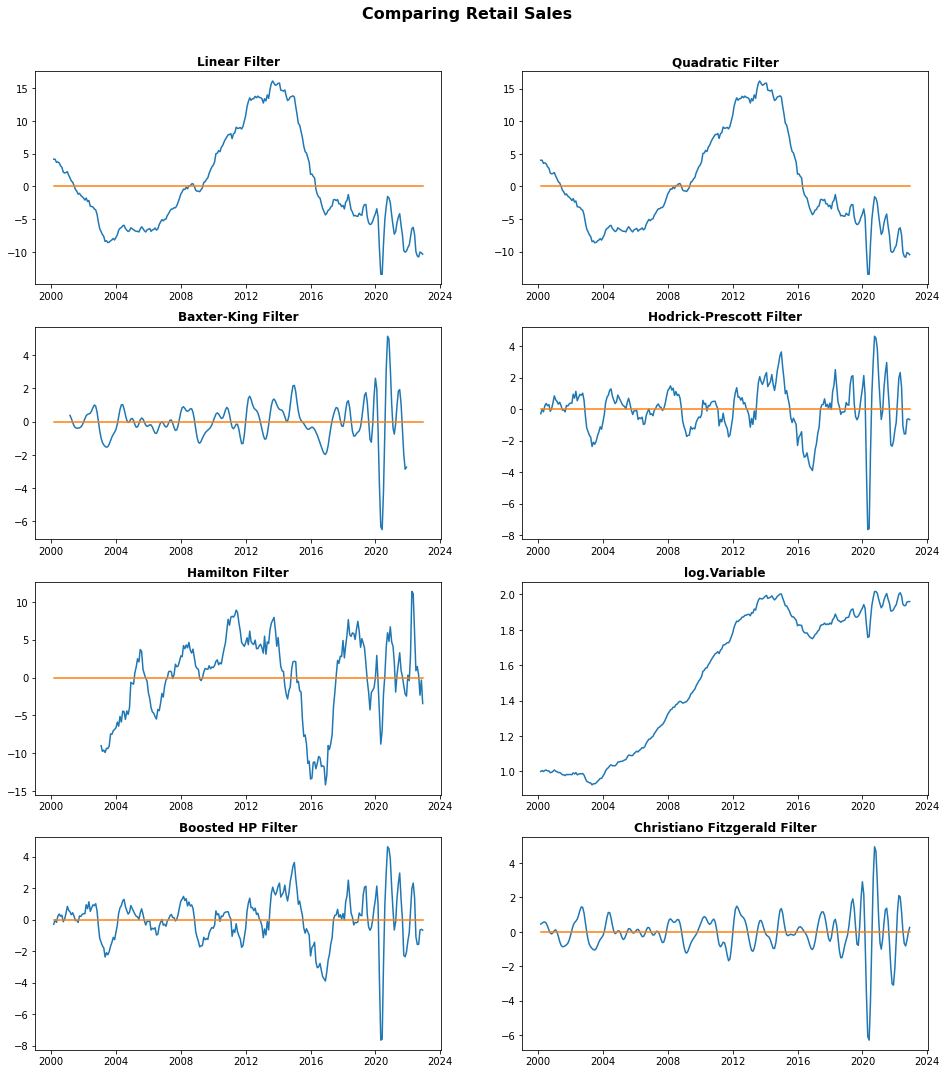

In [4]:
from onefilter import filter_var
from onedessaz import deseasonalize

variable = dict_data["sgsm"]["Retail Sales"]

## IF VARIABLE SA
#var_dessaz = variable

## IF VARIABLE NSA
var_dessaz = deseasonalize(var = variable,type="STL") 
filter_var(var=var_dessaz,var_name=variable.name,period="monthly_smoothed")

## Using our series_dictionary, we can also find the specific desired variable

### By Category

In [5]:
series["Category"].unique()

array(['Soft Data, Commerce', 'Hard Data, Services',
       'Hard Data, Retail Sales', 'Soft Data, Consumer',
       'Soft Data, Services', 'Hard Data, Production', 'Hard Data, IP',
       'Hard Data, Labor Market', 'Soft Data, Manufacturing', 'GDP Proxy',
       'Monetary Aggregates', 'Hard Data, GDP', 'Hard Data, GDP SA',
       'External Sector', 'Fiscal', 'Price indicators', 'Fixed Income',
       'Soft Data, Business', 'Soft Data, Construction', 'Soft Data, PMI',
       nan], dtype=object)

In [6]:
series[series["Category"]=="Hard Data, GDP"]

,Source,Code,Name,Category,Freq
59,SGS,22083,Crop and livestock (total) SCN 2010,"Hard Data, GDP",Q
60,SGS,22084,Industry (total) SCN-2010,"Hard Data, GDP",Q
61,SGS,22085,Mining SCN-2010,"Hard Data, GDP",Q
62,SGS,22086,Manufacturing SCN-2010,"Hard Data, GDP",Q
63,SGS,22087,Building industry SCN-2010,"Hard Data, GDP",Q
64,SGS,22088,"Public utilities (electricity, gas and water s...","Hard Data, GDP",Q
65,SGS,22089,Services (total) SNC-2010,"Hard Data, GDP",Q
66,SGS,22090,Commerce SCN-2010,"Hard Data, GDP",Q
67,SGS,22091,"Transportation, storage and postal services SC...","Hard Data, GDP",Q
68,SGS,22092,Information services SCN-2010,"Hard Data, GDP",Q


### And apply Naive (unrecommended) or STL seasonalization

Original HP filter.


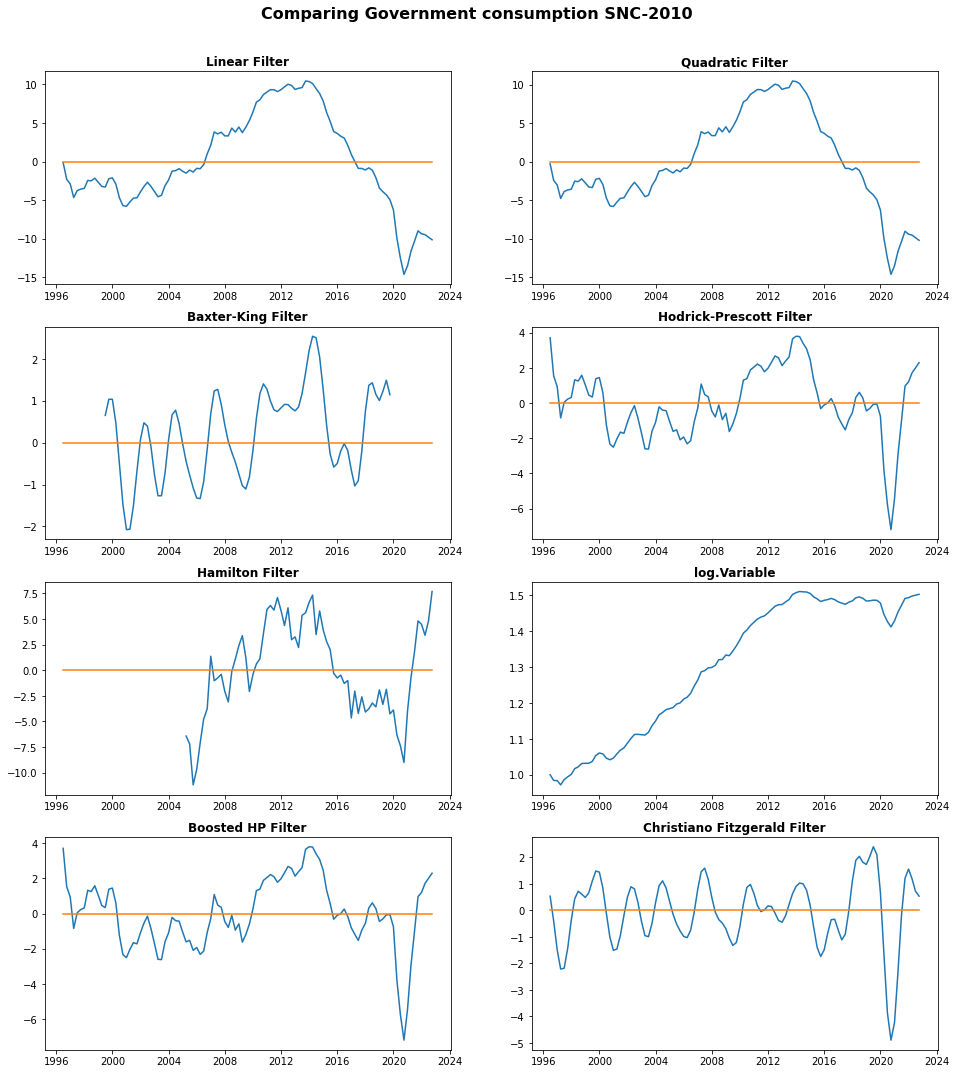

In [7]:
variable = dict_data["sgsq"]["Government consumption SNC-2010"]

## IF VARIABLE SA
#var_dessaz = variable

## IF VARIABLE NSA
var_dessaz = deseasonalize(var = variable,type="STL") 
filter_var(var=var_dessaz,var_name=variable.name,period="monthly_smoothed")

## Or use previously Seasonally Adjusted Time Series

In [8]:
series[series["Category"]=="Hard Data, GDP SA"]

,Source,Code,Name,Category,Freq
81,SGS,22105,Crop and livestock (total) SCN 2010 SA,"Hard Data, GDP SA",Q
82,SGS,22106,Industry (total) SCN-2010 SA,"Hard Data, GDP SA",Q
83,SGS,22107,Services (total) SNC-2010 SA,"Hard Data, GDP SA",Q
84,SGS,22108,Value added at basic prices SCN-2010 SA,"Hard Data, GDP SA",Q
85,SGS,22109,GDP at market prices SCN-2010 SA,"Hard Data, GDP SA",Q
86,SGS,22110,Private consumption SCN-2010 SA,"Hard Data, GDP SA",Q
87,SGS,22111,Government consumption SNC-2010 SA,"Hard Data, GDP SA",Q
88,SGS,22113,Investment SCN-2010 SA,"Hard Data, GDP SA",Q
89,SGS,22114,Exports SCN-2010 SA,"Hard Data, GDP SA",Q
90,SGS,22115,Imports SCN-2010 SA,"Hard Data, GDP SA",Q


Original HP filter.


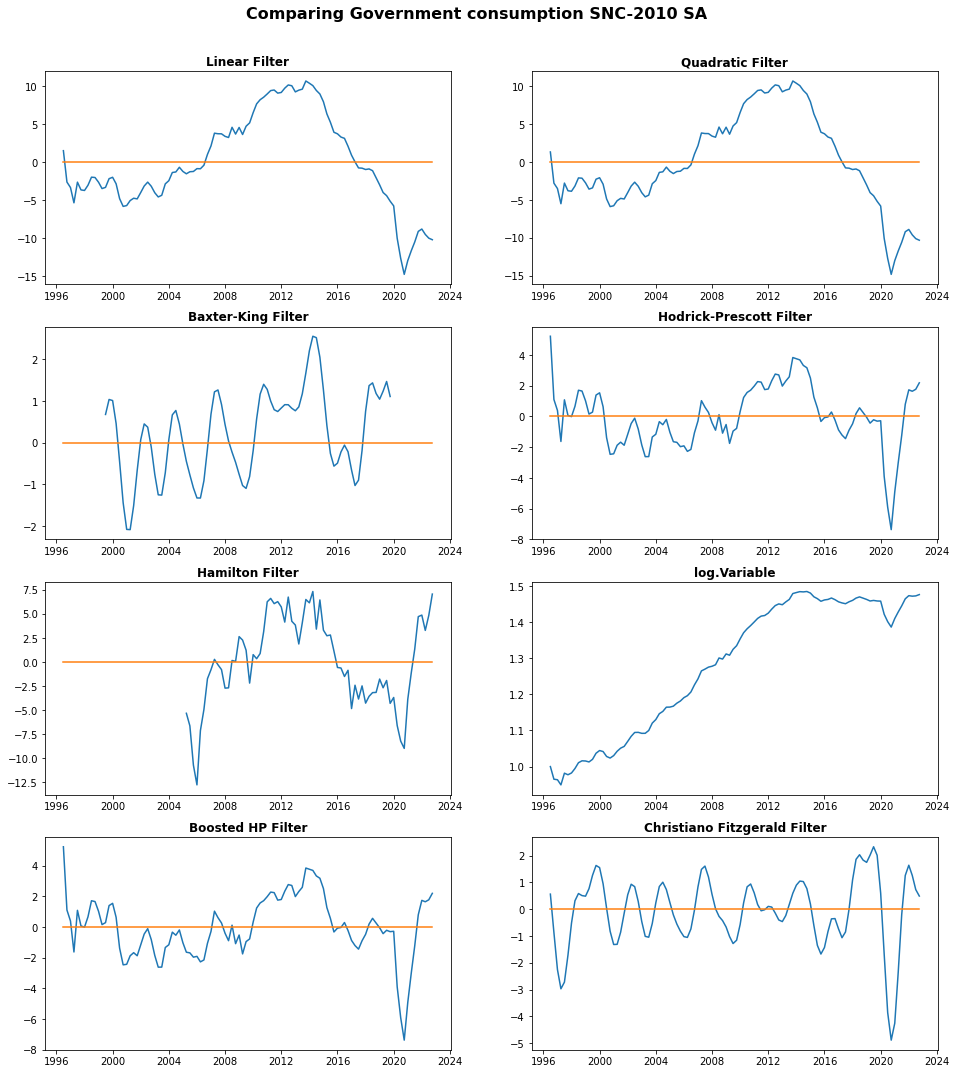

In [24]:
variable = dict_data["sgsq"]["Government consumption SNC-2010 SA"]

## IF VARIABLE SA
var_dessaz = variable

## IF VARIABLE NSA
#var_dessaz = deseasonalize(var = variable,type="STL") 
filter_var(var=var_dessaz,var_name=variable.name,period="monthly_smoothed")